In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## Посмотрим на данные

In [2]:
df = pd.read_csv('train.csv')
df.shape

(59381, 128)

In [3]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
# В основном все в числовом виде, только один признак (Product_Info_2) закодирован какой-то видимо порядковой статистикой
np.unique(df.dtypes.values, return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([109,  18,   1], dtype=int64))

In [5]:
# Да, можем потом перекодировать просто ранжированием, но в одном из обсуждений на кагл говорится что лучше 
# сделать несколько разных переменных, пусть так и будет, хотя не факт что это хорошо для не xgboost
df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

Признаков много, глянем что там вообще есть

In [6]:
# Product_Info
df[df.columns[df.columns.str.contains('Product_Info')]].head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7
0,1,D3,10,0.076923,2,1,1
1,1,A1,26,0.076923,2,3,1
2,1,E1,26,0.076923,2,3,1
3,1,D4,10,0.487179,2,3,1
4,1,D2,26,0.230769,2,3,1


In [7]:
# Employment_Info
df[df.columns[df.columns.str.contains('Employment_Info')]].head()

,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6
0,0.028,12,1,0.0,3,NaN
1,0.000,1,3,0.0,2,0.0018
2,0.030,9,1,0.0,2,0.0300
3,0.042,9,1,0.0,3,0.2000
4,0.027,9,1,0.0,2,0.0500


In [8]:
# Medical_Keyword
df[df.columns[df.columns.str.contains('Medical_Keyword')]].head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Medical_History
df[df.columns[df.columns.str.contains('Medical_History')]].head()

,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,...,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41
0,4.0,112,2,1,1,3,2,2,1,NaN,...,NaN,1,3,1,2,2,1,3,3,3
1,5.0,412,2,1,1,3,2,2,1,NaN,...,NaN,3,1,1,2,2,1,3,3,1
2,10.0,3,2,2,1,3,2,2,2,NaN,...,NaN,3,3,1,3,2,1,3,3,1
3,0.0,350,2,2,1,3,2,2,2,NaN,...,NaN,3,3,1,2,2,1,3,3,1
4,NaN,162,2,2,1,3,2,2,2,NaN,...,NaN,3,3,1,3,2,1,3,3,1


In [10]:
# Insurance_History
df[df.columns[df.columns.str.contains('Insurance_History')]].head()

,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9
0,1,1,3,1,0.000667,1,1,2
1,2,1,3,1,0.000133,1,3,2
2,2,1,1,3,NaN,3,2,3
3,2,1,1,3,NaN,3,2,3
4,2,1,1,3,NaN,3,2,3


In [11]:
# Medical_History
df[df.columns[df.columns.str.contains('InsuredInfo')]].head()

,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7
0,1,2,6,3,1,2,1
1,1,2,6,3,1,2,1
2,1,2,8,3,1,1,1
3,2,2,8,3,1,2,1
4,1,2,6,3,1,2,1


In [12]:
# Family_Hist
df[df.columns[df.columns.str.contains('Family_Hist')]].head()

,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
0,2,NaN,0.598039,NaN,0.526786
1,2,0.188406,NaN,0.084507,NaN
2,3,0.304348,NaN,0.225352,NaN
3,3,0.420290,NaN,0.352113,NaN
4,2,0.463768,NaN,0.408451,NaN


In [13]:
# Другие колонки
df[df.columns[df.columns.str.contains('|'.join(['Product', 'Employment_Info', 'Medical_Keyword',
                                             'Medical_History', 'Insurance_History', 'InsuredInfo',
                                             'Family_Hist'])) == False]].head()

,Id,Ins_Age,Ht,Wt,BMI,Response
0,2,0.641791,0.581818,0.148536,0.323008,8
1,5,0.059701,0.600000,0.131799,0.272288,4
2,6,0.029851,0.745455,0.288703,0.428780,8
3,7,0.164179,0.672727,0.205021,0.352438,8
4,8,0.417910,0.654545,0.234310,0.424046,8


В целом все параметры представляют из себя просто набор цифр с которыми мало что можно сделать, я просто взял скрипт из обсуждений, который помог занять второе место. Плюс еще добавил стандартизацию, для KNN полезно должно быть

In [14]:
# Product_Info_2 перекодируем в несколько переменных
df['Product_Info_2_char'] = df.Product_Info_2.str[0]
df['Product_Info_2_num'] = df.Product_Info_2.str[1]
df['Product_Info_2'] = pd.factorize(df['Product_Info_2'])[0]
df['Product_Info_2_char'] = pd.factorize(df['Product_Info_2_char'])[0]
df['Product_Info_2_num'] = pd.factorize(df['Product_Info_2_num'])[0]

In [15]:
# что-то вроде индекса полноты на возраст
df['BMI_Age'] = df['BMI'] * df['Ins_Age']
# опять же фича из обсуждений на кагле
med_keyword_columns = df.columns[df.columns.str.startswith('Medical_Keyword_')]
df['Med_Keywords_Count'] = df[med_keyword_columns].sum(axis=1)
df.drop(columns=med_keyword_columns, inplace=True)

In [16]:
# странная фича, но пусть будет
df['countna'] = df.apply(lambda x: sum(x.isnull()),1)

In [17]:
# id не особо нужен
df.drop('Id', axis=1, inplace=True)
df.shape

(59381, 84)

In [18]:
# заполним единственный не числовой признак
sorted_values = dict(zip(np.unique(df['Product_Info_2'].sort_values().values), range(len(df['Product_Info_2'].unique()))))
df['Product_Info_2'] = df['Product_Info_2'].apply(lambda x: sorted_values[x])

In [19]:
# бинарные признаки оставим без изменений
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

binaries_columns = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]
standard_columns = [i for i in df.columns if i not in binaries_columns and i != 'Response']

df[standard_columns] = scaler.fit_transform(df[standard_columns])

In [20]:
# удалим совсем плохо заполненные столбцы
nan_columns = df.isna().sum()[df.isna().sum() != 0] / df.shape[0]
df.drop(nan_columns[nan_columns > 0.7].keys(), axis=1, inplace=True)
df.shape

(59381, 79)

In [21]:
# остальные пропуски заполним чем-то очень большим
df.fillna(-1000, inplace=True)
assert all(df.isna().sum() == 0)

In [22]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Response,Product_Info_2_char,Product_Info_2_num,BMI_Age,Med_Keywords_Count,countna
0,-0.164525,-1.134051,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-1.690031,-1.617886,...,-0.069812,0.304099,0.128359,1.455973,8,-0.605233,-1.126402,0.121993,-0.854442,-0.572625
1,-0.164525,-0.852417,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.445119,-1.805858,...,-0.069812,0.304099,0.128359,-0.686839,4,0.612101,-0.546185,-1.591454,-0.854442,-1.496194
2,-0.164525,-0.570782,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.905363,0.514174,-0.043622,...,-0.069812,0.304099,0.128359,-0.686839,8,1.829435,-0.546185,-1.622455,-0.854442,0.350944
3,-0.164525,-0.289147,-2.841731,0.559979,-0.083689,0.441621,-0.149284,-1.224146,-0.465473,-0.983481,...,-0.069812,0.304099,0.128359,-0.686839,8,-0.605233,0.034033,-1.218294,-0.178868,0.350944
4,-0.164525,-0.007513,0.312319,-0.347476,-0.083689,0.441621,-0.149284,0.062599,-0.710384,-0.654530,...,-0.069812,0.304099,0.128359,-0.686839,8,-0.605233,0.614250,-0.147880,-0.854442,1.274513


Больше на кагле ничего особо хорошего не нашел кроме разве что "давайте возьмем корень из каких-то рандомных колонок", но там не очень высокие результаты поэтому решил оставить так

## Models

Разобъем все на train и test (файл test.csv использовать не будем, т.к. не очень удобно тестировать качество)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Response'), df['Response'], test_size=0.2, random_state=42)

У нас возникает проблема что за метрику взять. У нас нет каких-то предпочтений в классах, т.е. ошибка в предсказании класса 4 равносильна ошибке в классе 7. Но классы распределены не очень равномерно к тому же наврное если мы ошиблись на один класс это менее страшно чем если бы мы ошиблись на несколько классов, т.к. таргет все же ранжированная переменная, а не просто какие-то обособленные классы. 

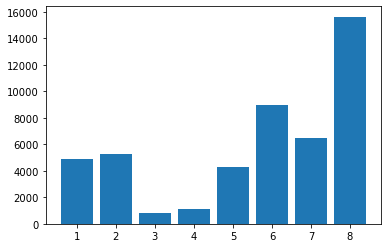

In [24]:
# посмотрим на распределение классов
plt.bar(y_train.value_counts().keys(), y_train.value_counts().values)
pass

In [25]:
# Сделаем свою метрику, просто посчитаем на сколько мы в среднем ошибаемся
def my_metric(y_true, y_pred):
    error = sum(abs(y_pred - y_true)) / y_true.shape[0]
    return error

### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [27]:
# посмотрим на модели с разным количеством соседей для разных типов весов
score_uniform = []
score_distance = []
best_score = 100000
best_neighbors = 0

for i in tqdm(range(1, 31)):
    # init models
    model_uniform = KNeighborsClassifier(n_jobs=-1, weights='uniform', n_neighbors=i)
    model_distance = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=i)
    # fit models
    model_uniform.fit(X_train, y_train)
    model_distance.fit(X_train, y_train)
    # get preds
    pred_uniform = model_uniform.predict(X_test)
    pred_distance = model_distance.predict(X_test)
    # get score
    temp_uniform = my_metric(y_test, pred_uniform)
    temp_distance = my_metric(y_test, pred_distance)
    if temp_uniform < best_score:
        best_neighbors = [i, 'uniform']
        best_score = temp_uniform
    if temp_distance < best_score:
        best_neighbors = [i, 'distance']
        best_score = temp_distance
    score_uniform.append(temp_uniform)
    score_distance.append(temp_distance)

100%|██████████| 30/30 [09:42<00:00, 19.43s/it]


Best Neighbors: 16 and best weights: uniform


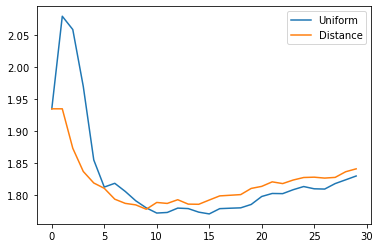

In [28]:
# Визуализируем зависимость качества от количества соседей
print('Best Neighbors: {} and best weights: {}'.format(best_neighbors[0], best_neighbors[1]))
plt.plot(score_uniform)
plt.plot(score_distance)
plt.legend(['Uniform', 'Distance'])
pass

In [29]:
%%time
# посмотрим на итоговое качество
model = KNeighborsClassifier(n_jobs=-1, weights='uniform', n_neighbors=16)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = my_metric(y_test, y_pred)
print('Model score: {}'.format(score))

Model score: 1.7699755830596953
Wall time: 9.3 s


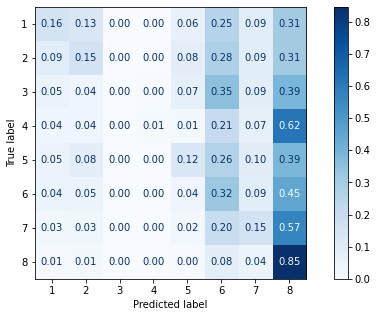

In [30]:
# и на confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax, normalize='true', values_format='.2f')
pass

Выглядит довольно плохо, в целом такой классификатор использовать нельзя

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
%%time
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = my_metric(y_test, y_pred)
print('Model score: {}'.format(score))

Model score: 1.5429822345710196
Wall time: 42.3 s


C:\Users\Maksim_Krug\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


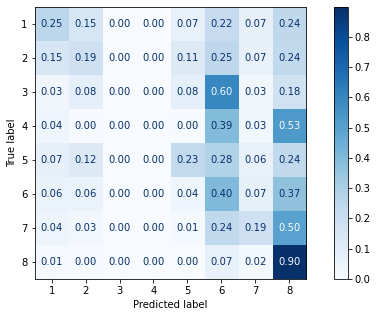

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax, normalize='true', values_format='.2f')
pass

Качество немного получше, но тоже не сильно хорошее, особенно для классов в середине. Попробуем подобрать параметры модели

In [34]:
import optuna
from sklearn.model_selection import cross_val_score
np.random.seed(42)

In [35]:
def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    alpha = trial.suggest_uniform('alpha', 0, 10)
    if penalty == 'l1':
        model = LogisticRegression(max_iter=100, n_jobs=-1, penalty=penalty, C=alpha, solver='saga')
    elif penalty == 'elasticnet':
        l1_ratio = trial.suggest_uniform('l1_ration', 0, 1)
        model = LogisticRegression(max_iter=100, n_jobs=-1, penalty=penalty, C=alpha, solver='saga', l1_ratio=l1_ratio)
    elif penalty == 'l2':
        model = LogisticRegression(max_iter=100, n_jobs=-1, penalty=penalty, C=alpha)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5)
    score = score.mean()       
    return score

In [36]:
%%time
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=30*60, show_progress_bar=True)

[I 2020-10-28 13:39:37,061] A new study created in memory with name: no-name-58ee21d7-0487-47c8-8d2f-0256d60cb611
C:\Users\Maksim_Krug\Anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


[I 2020-10-28 13:40:27,435] Trial 0 finished with value: 0.4016924844476205 and parameters: {'penalty': 'l1', 'alpha': 3.047292337535966}. Best is trial 0 with value: 0.4016924844476205.
[I 2020-10-28 13:40:36,453] Trial 1 finished with value: 0.4323635916440929 and parameters: {'penalty': 'l2', 'alpha': 0.9348194462362369}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:41:25,647] Trial 2 finished with value: 0.4016924933109534 and parameters: {'penalty': 'elasticnet', 'alpha': 5.8742864216502655, 'l1_ration': 0.31558060874779503}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:42:15,062] Trial 3 finished with value: 0.4018187913737612 and parameters: {'penalty': 'l1', 'alpha': 1.7310763416896402}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:43:03,351] Trial 4 finished with value: 0.40173458971077836 and parameters: {'penalty': 'elasticnet', 'alpha': 8.216618500326332, 'l1_ration': 0.6603068666238706}. Best is trial 1 with value

[I 2020-10-28 13:54:00,401] Trial 40 finished with value: 0.4319004692026878 and parameters: {'penalty': 'l2', 'alpha': 1.2466808181340954}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:54:07,557] Trial 41 finished with value: 0.4320478132495748 and parameters: {'penalty': 'l2', 'alpha': 1.940810235290233}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:54:14,663] Trial 42 finished with value: 0.4322793789019438 and parameters: {'penalty': 'l2', 'alpha': 3.041066826939209}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:54:22,066] Trial 43 finished with value: 0.43200571684974987 and parameters: {'penalty': 'l2', 'alpha': 2.96613889444153}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:54:29,173] Trial 44 finished with value: 0.4321530741916363 and parameters: {'penalty': 'l2', 'alpha': 3.37277628145054}. Best is trial 1 with value: 0.4323635916440929.
[I 2020-10-28 13:54:36,494] Trial 45 finished with value: 0.

[I 2020-10-28 14:02:37,990] Trial 81 finished with value: 0.4319004669868546 and parameters: {'penalty': 'l2', 'alpha': 0.9548738629655611}. Best is trial 75 with value: 0.43246884593865464.
[I 2020-10-28 14:02:48,306] Trial 82 finished with value: 0.4320478110337416 and parameters: {'penalty': 'l2', 'alpha': 1.6366179170638298}. Best is trial 75 with value: 0.43246884593865464.
[I 2020-10-28 14:02:59,218] Trial 83 finished with value: 0.43223725812795327 and parameters: {'penalty': 'l2', 'alpha': 0.6367840186825143}. Best is trial 75 with value: 0.43246884593865464.
[I 2020-10-28 14:03:09,690] Trial 84 finished with value: 0.4320267783446618 and parameters: {'penalty': 'l2', 'alpha': 1.468353955993833}. Best is trial 75 with value: 0.43246884593865464.
[I 2020-10-28 14:03:20,038] Trial 85 finished with value: 0.4324898764119013 and parameters: {'penalty': 'l2', 'alpha': 0.04863619922193907}. Best is trial 85 with value: 0.4324898764119013.
[I 2020-10-28 14:03:31,402] Trial 86 finished

In [37]:
print('Best Params: {}, Best Score: {}'.format(study.best_params, study.best_value))

Best Params: {'penalty': 'l2', 'alpha': 0.9276819422418382}, Best Score: 0.43257411352821584


In [40]:
%%time
# давайте посмотрим что получилось с новыми параметрами
model = LogisticRegression(max_iter=1000, n_jobs=-1, penalty='l2', C=0.9276)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = my_metric(y_test, y_pred)
print('Model score: {}'.format(score))

Model score: 1.4948219247284669
Wall time: 1min 47s


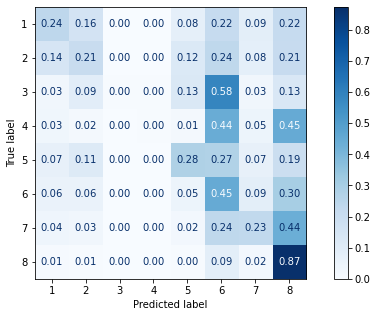

In [41]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax, normalize='true', values_format='.2f')
pass

Не сильно помогло улучшить качество, жаль. Плюс проблема с классами 3 и 4 осталась.

### Ordinal Classification

Здесь я взял реализацию из статьи "A Simple Approach to Ordinal Classification", т.к. на питоне нет каких-то хороших библиотек, которые это реализуют, а в статье все достаточно просто описано. <br><br>
Примерный алгоритм выглядит так:
- Разделим на k-1 датасетов где target > some value
- Построим для всех новых датасетов модель, но получим вероятность (например в логистической регрессии)
- Для того, чтобы найти вероятность, например, класса 3, нам надо: Pr(3) = Pr(>2) - Pr(>3); для первого класса: Pr(1) = 1 - Pr(>1); для последнего класса: Pr(k) = Pr(>k-1)

In [42]:
from warnings import filterwarnings
filterwarnings('ignore')

In [43]:
def ordinal_classification(X_train, X_test, y_train, y_test):
    class_probs = pd.DataFrame()
    for target in tqdm(range(1, 9)):
        if target == 1:
            model = LogisticRegression(max_iter=1000, penalty='l2', C=0.93)
            new_train = [1 if i > 1 else 0 for i in y_train]
            model.fit(X_train, new_train)
            pr_v = 1 - model.predict_proba(X_test)[:, 1]
            class_probs['1'] = pr_v
        elif target == 8:
            model = LogisticRegression(max_iter=1000, penalty='l2', C=0.93)
            new_train = [1 if i > 7 else 0 for i in y_train]
            model.fit(X_train, new_train)
            pr_v = model.predict_proba(X_test)[:, 1]
            class_probs['8'] = pr_v
        else:
            model1 = LogisticRegression(max_iter=1000, penalty='l2', C=0.93)
            model2 = LogisticRegression(max_iter=1000, penalty='l2', C=0.93)
            new_train1 = [1 if i > target-1 else 0 for i in y_train]
            new_train2 = [1 if i > target else 0 for i in y_train]
            model1.fit(X_train, new_train1)
            model2.fit(X_train, new_train2)
            pr_v1 = model1.predict_proba(X_test)[:, 1]
            pr_v2 = model2.predict_proba(X_test)[:, 1]
            pr_v = pr_v1 - pr_v2
            class_probs[target] = pr_v
    
    return class_probs

In [50]:
# Посчитаем все и посмотрим на качество
class_probs = ordinal_classification(X_train, X_test, y_train, y_test)
y_pred = class_probs.idxmax(axis=1).astype('int')
score = sum(abs(y_pred.values - y_test.values)) / y_test.shape[0]
print('Model score: {}'.format(score))

100%|██████████| 8/8 [03:49<00:00, 28.66s/it]

Model score: 1.4546602677443798


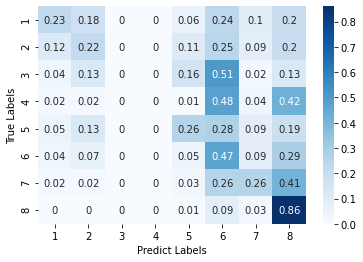

In [51]:
# И визуализируем confusion matrix
cm = confusion_matrix(y_test.values, y_pred.values, normalize='true')
sns.heatmap(np.round(cm, 2), annot=True, cmap=plt.cm.Blues,
            xticklabels=[1,2,3,4,5,6,7,8], yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
pass

Стало еще немного получше, но не прям чтоб сильно, проблема с 3 и 4 классами также не решилась, что пичально, но видимо их просто очень мало и стоит взять другую модель, например давайте попробуем xgboost, он был хорош судя по результатам

In [55]:
def ordinal_classification_xgb(X_train, X_test, y_train, y_test):
    class_probs = pd.DataFrame()
    for target in tqdm(range(1, 9)):
        if target == 1:
            model = XGBClassifier()
            new_train = [1 if i > 1 else 0 for i in y_train]
            model.fit(X_train, new_train)
            pr_v = 1 - model.predict_proba(X_test)[:, 1]
            class_probs['1'] = pr_v
        elif target == 8:
            model = XGBClassifier()
            new_train = [1 if i > 7 else 0 for i in y_train]
            model.fit(X_train, new_train)
            pr_v = model.predict_proba(X_test)[:, 1]
            class_probs['8'] = pr_v
        else:
            model1 = XGBClassifier()
            model2 = XGBClassifier()
            new_train1 = [1 if i > target-1 else 0 for i in y_train]
            new_train2 = [1 if i > target else 0 for i in y_train]
            model1.fit(X_train, new_train1)
            model2.fit(X_train, new_train2)
            pr_v1 = model1.predict_proba(X_test)[:, 1]
            pr_v2 = model2.predict_proba(X_test)[:, 1]
            pr_v = pr_v1 - pr_v2
            class_probs[target] = pr_v
    
    return class_probs

In [59]:
# просто без ordinal regression
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = my_metric(y_test, y_pred)
print('Model score: {}'.format(score))

Model score: 1.2972972972972974


In [56]:
# с ordinal regression
class_probs = ordinal_classification_xgb(X_train, X_test, y_train, y_test)
y_pred = class_probs.idxmax(axis=1).astype('int')
score = sum(abs(y_pred.values - y_test.values)) / y_test.shape[0]
print('Model score: {}'.format(score))

100%|██████████| 8/8 [01:54<00:00, 14.32s/it]

Model score: 1.2886250736718026


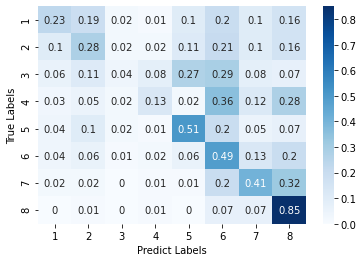

In [57]:
# И визуализируем confusion matrix
cm = confusion_matrix(y_test.values, y_pred.values, normalize='true')
sns.heatmap(np.round(cm, 2), annot=True, cmap=plt.cm.Blues,
            xticklabels=[1,2,3,4,5,6,7,8], yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
pass

В целом немного ordinal regression помогает, что уже неплохо, но в конретно этой задаче сильного улучшения добиться не удалось

### Interpret ML

Посмотрим что есть в этой библиотеке
#### СКОРЕЕ ВСЕГО В ГИТХАБЕ НЕ ВИДНО ЧТО ЗДЕСЬ, МОГУ ПРОСТО СО СВОЕГО ЭКРАНА ПОКАЗАТЬ

In [81]:
from interpret.glassbox import ExplainableBoostingClassifier, ClassificationTree, LogisticRegression
from interpret import show

In [63]:
%%time
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

Wall time: 19min 28s


ExplainableBoostingClassifier(feature_names=['Product_Info_1', 'Product_Info_2',
                                             'Product_Info_3', 'Product_Info_4',
                                             'Product_Info_5', 'Product_Info_6',
                                             'Product_Info_7', 'Ins_Age', 'Ht',
                                             'Wt', 'BMI', 'Employment_Info_1',
                                             'Employment_Info_2',
                                             'Employment_Info_3',
                                             'Employment_Info_4',
                                             'Employment_Info_5',
                                             'Employment_Info_6',
                                             'InsuredInfo_1', 'InsuredInfo_2',
                                             'Insured...
                                             'categorical', 'categorical',
                                             'continuous'

In [67]:
# посмортим на качество
y_pred = ebm.predict(X_test)
score = my_metric(y_test, y_pred)
print('Model score: {}'.format(score))

Model score: 1.3366169908225982


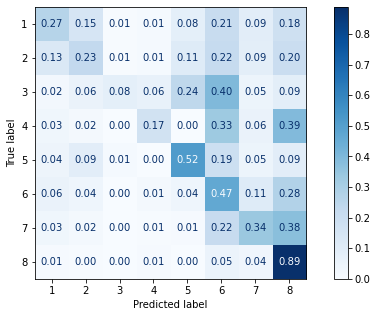

In [68]:
# и на confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
plot_confusion_matrix(ebm, X_test, y_test, cmap=plt.cm.Blues, ax=ax, normalize='true', values_format='.2f')
pass

Впринципе неплохо, но основная фича - интерпретируемость результатов, давайте посмотрим что с ней

In [65]:
# во-первых есть глобальное описание, можно посмотреть summary с важностью каждой переменной. 
# наибольшее влияние оказывает BMI, а countna оказалась тоже неплохой переменной
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/1991436151832/ -->

In [72]:
# можно посмотреть на конкретную переменную и как она влияет на таргет при всех значениях
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/1991430530720/ -->

In [69]:
# Можно посмотреть на конкретное наблюдение и почему получился конкретный предикт
# Для большого количества данных это не очень эффективно, но для маленьких данных прям отлично, особенно если есть какие-то выбросы
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

<!-- http://127.0.0.1:7001/1991464170160/ -->

In [78]:
%%time
# посмотрим на другие модели и сравним их
tree_explain = ClassificationTree()
logistic_explain = LogisticRegression()
tree_explain.fit(X_train, y_train)
logistic_explain.fit(X_train, y_train)

Wall time: 6.69 s


In [80]:
# можно две разные модели сравнить, но это не очень удобно на небольшом экране
show([tree_explain.explain_global(), logistic_explain.explain_global()])

<!-- http://127.0.0.1:7001/1991756155272/ -->
 Open in new window

В итоге библиотека довольно неплохая, особенно возможность посмотреть на конкретный предикт, это прям классно, но пока только альфа версия и не так много фич, хотя сама библиотека работает стабильно, что тоже радует

##### P.S. По итогу получилось не так много какого-то исследования, возможно я что-то упустил